# Improving the Data

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import statistics as st
import scipy as  sp

In [2]:
File = pd.ExcelFile(r"C:\Users\Amarpreet Singh\Desktop\Innovaccer\data.xlsx")
File.sheet_names

['Problem Statement', 'Data', 'Data Dictionary', 'Sheet2']

In [202]:
#reading the data sheet, storing into a dataframe
data= pd.read_excel(File, 'Data')
display(data.head())
data.info()

,aco_num,aco_name,qualscore,qualperfshare,n_ab,n_ben_age_0_64,n_ben_age_65_74,n_ben_age_75_84,n_ben_age_85plus,n_ben_female,n_ben_male,n_ben_race_white,n_ben_race_black,n_ben_race_asian,n_ben_race_hisp,n_ben_race_native,n_ben_race_other,readm_rate_1000,prov_rate_1000,p_em_total,p_em_pcp_vis,p_em_sp_vis,p_nurse_vis,p_fqhc_rhc_vis,n_cah,n_fqhc,n_rhc,n_eta,n_fac_other,n_pcp,n_spec,n_np,n_pa,n_cns,py,aco_state,per_capita_exp_total_py,aim,met_qps,aco1,aco2,aco3,aco4,aco5,aco6,aco7,aco34,aco8,aco35,aco36,aco37,aco38,aco11,aco13,aco14,aco15,aco16,aco17,aco18,aco19,aco20,aco42,aco40,dm_comp,aco27,aco41,aco28,aco30,aco44,aco43,aco12
0,A67373,"Palm Beach Accountable Care Organization, LLC",1.0,0.5,36268,3178,11716,10013,5897,17789,13015,27497,2080,185.0,554.0,12.0,476,164.373717,797.330595,14776.18333,5253.676737,8814.096808,698.069748,10.340039,0,0,0,0,0,118,167,44,0,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A38665,Chinese Community Accountable Care Organizatio...,1.0,0.5,13833,1129,4160,4393,1957,7067,4572,834,234,8922.0,102.0,2.0,1545,150.966680,831.345125,15622.09930,9401.238513,6059.281134,122.352734,39.226921,0,0,0,0,0,91,164,15,0,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A64796,Summit Health Solutions,1.0,0.5,40595,5508,16680,10728,4420,21051,16285,35819,978,72.0,32.0,21.0,414,130.616074,792.869801,10056.24207,4590.886523,4042.809069,1406.217245,16.329233,0,0,0,0,11,255,200,140,2,1,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A84830,"South Florida Accountable Care Organization,LLC",1.0,0.5,6150,903,2195,2007,1045,3636,2514,4342,471,30.0,1191.0,5.0,111,195.585530,761.496015,13112.59056,5543.483734,6996.111779,544.630619,28.364430,0,0,0,0,0,37,45,3,0,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A76261,"Hackensack Physician-Hospital Alliance ACO, LLC",1.0,0.5,16383,1399,6106,4282,2124,8328,5583,12479,598,142.0,295.0,5.0,392,159.579668,824.780059,12513.99002,4770.948069,7212.271299,526.926631,3.844021,0,1,0,0,0,147,377,76,4,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849 entries, 0 to 1848
Data columns (total 71 columns):
aco_num                    1849 non-null object
aco_name                   1849 non-null object
qualscore                  1641 non-null float64
qualperfshare              1849 non-null float64
n_ab                       1849 non-null int64
n_ben_age_0_64             1849 non-null int64
n_ben_age_65_74            1849 non-null int64
n_ben_age_75_84            1849 non-null int64
n_ben_age_85plus           1849 non-null int64
n_ben_female               1849 non-null int64
n_ben_male                 1849 non-null int64
n_ben_race_white           1849 non-null int64
n_ben_race_black           1849 non-null int64
n_ben_race_asian           1848 non-null float64
n_ben_race_hisp            1848 non-null float64
n_ben_race_native          1837 non-null float64
n_ben_race_other           1849 non-null int64
readm_rate_1000            1849 non-null float64
prov_rate_1000             1849 n

In [256]:
# for i in data.columns:
#     print(i, ':', data[i].value_counts())

In [257]:
data['qualscore'].unique()

array([  1.        ,   0.        ,   0.91696429,   0.86584821,
         0.93136161,   0.87265625,   0.89430804,   0.94375   ,
         0.93571429,   0.896875  ,   0.87678571,   0.85446429,
         0.83872768,   0.90959821,   0.9109375 ,   0.93002232,
         0.91227679,   0.871875  ,   0.89564732,   0.89118304,
         0.91071429,   0.90892857,   0.91796875,   0.64073661,
         0.90189732,   0.90457589,   0.90022321,   0.88950893,
         0.88337054,   0.72790179,   0.80602679,   0.86183036,
         0.87712054,   0.88816964,   0.77098214,   0.91763393,
         0.79408482,   0.87176339,   0.85189732,   0.86517857,
         0.87633929,   0.81484375,   0.9015625 ,   0.73995536,
         0.76863839,   0.84944196,   0.84810268,   0.91026786,
         0.78816964,   0.9203125 ,   0.92098214,   0.93537946,
         0.95111607,   0.87946429,   0.87611607,   0.92232143,
         0.93872768,   0.85223214,   0.85647321,   0.85122768,
         0.8234375 ,   0.80859375,   0.92299107,   0.88

In [206]:
#making a copy of original dataframe
new = data.copy()

In [207]:
#erroneous values
errvals1 = [   98.08      ,  86.2       ,  95.7       ,  99.22      ,
        89.84      ,  94.09      ,  96.08      ,  87.99      ,
        83.41      ,  94.19      ,  87.75      ,  99.3       ,
        93.91      ,  87.4       ,  87.18      ,  87.19      ,
        97.7       ,  93.68      ,  74.11      ,  98.06      ,
        87.36      ,  86.92      ,  95.03      ,  91.06      ,
        93.5       ,  91.41      ,  99.11      ,  88.89      ,
        96.01      ,  93.63      ,  92.42      ,  39.03      ,
        90.64      ,  93.13      ,  92.24      ,  88.43      ,
        88.04      ,  89.48      ,  81.34      ,  90.93      ,
        86.37      ,  93.96      ,  89.42      ,  91.89      ,
        97.19      ,  95.16      ,  96.11      ,  96.54      ,
        95.97      ,  96.48      ,  99.81      ,  98.59      ,
        90.8       ,  87.69      ,  92.44      ,  95.22      ,
        97.24      ,  97.66      ,  81.8       ,  87.65      ,
        94.69      ,  93.62      ,  94.55      ,  97.08      ,
       100.        ,  88.92      ,  95.77      ,  86.23      ,
        92.05      ,  89.76      ,  94.47      ,  92.97      ,
        93.76      ,  93.41      ,  93.16      ,  93.03      ,
        94.83      ,  93.75      ,  95.24      ,  98.44      ,
        91.39      ,  90.75      ,  93.        ,  99.53      ,
        93.7       ,  95.91      ,  89.05      ,  93.59      ,
        94.5       ,  98.56      ,  94.62      ,  90.56      ,
        72.23      ,  95.31      ,  85.72      ,  81.22      ,
        93.34      ,  91.01      ,  90.33      ,  90.86      ,
        87.02      ,  97.64      ,  90.05      ,  78.24      ,
        63.35      ,  79.26      ,  96.25      ,  68.79      ,
        89.28      ,  97.58      ,  84.22      ,  41.19      ,
        94.29      ,  96.8       ,  88.13      ,  98.05      ,
        92.28      ,  94.92      ,  94.72      ,  98.13      ,
        92.71      ,  80.91      ,  93.49      ,  88.05      ,
        92.66      ,  94.12      ,  88.63      ,  96.09      ,
        96.69      ,  94.58      ,  91.99      ,  97.15      ,
        92.41      ,  70.26      ,  74.06      ,  98.15      ,
        86.99      ,  86.8       ,  92.38      ,  92.35      ,
        94.56      ,  93.39      ,  87.76      ,  81.59      ,
        91.85      ,  93.12      ,  97.47      ,  92.36      ,
        15.4       ,  88.07      ,  95.85      ,  88.82      ,
        76.43      ,  90.52      ,  93.25      ,  97.        ,
        90.34      ,  99.34      ,  89.67      ,  87.27      ,
        94.16      ,  93.09      ,  94.89      ,  88.26      ,
        80.38      ,  96.03      ,  94.14      ,  90.29      ,
        89.58      ,  89.9       ,  88.7       ,  91.86      ,
        93.56      ,  90.63      ,  80.86      ,  90.87      ,
        91.46      ,  95.25      ,  97.91      ,  94.8       ,
        96.42      ,  92.9       ,  98.26      ,  95.44      ,
        95.01      ,  96.        ,  90.03      ,  86.31      ,
        92.19      ,  91.6       ,  84.52      ,  94.42      ,
        98.17      ,  97.12      ,  31.75      ,  91.69      ,
        78.97      ,  86.4       ,  95.86      ,  91.38      ,
        97.97      ,  98.83      ,  93.31      ,  93.32      ,
        97.48      ,  96.88      ,  83.68      ,  94.13      ,
        87.73      ,  83.        ,  92.39      ,  93.79      ,
        85.15      ,  41.09      ,  96.02      ,  94.44      ,
        94.3       ,  89.29      ,  93.05      ,  96.87      ,
        97.03      ,  95.72      ,  98.36      ,  99.51      ,
        95.1       ,  93.53      ,  95.55      ,  93.77      ,
        92.89      ,  95.63      ,  95.52      ,  94.53      ,
        95.94      ,  90.85      ,  87.47      ,  92.32      ,
        95.39      ,  95.35      ,  95.23      ,  96.2       ,
        91.92      ,  95.62      ,  90.53      ,  96.66      ,
        93.51      ,  99.        ,  97.89      ,  97.68      ,
        92.26      ,  96.33      ,  94.06      ,  96.58      ,
        88.33      ,  69.94      ,  95.36      ,  89.22      ,
        91.58      ,  79.74      ,  98.        ,  94.22      ,
        94.38      ,  92.54      ,  98.16      ,  90.69      ,
        95.34      ,  95.12]

In [254]:
#diving by 100 to get them on same scale as other values (fractions)
newvals1 = [x/100 for x in errvals1]
# newvals1

In [253]:
newvals1 = ['%.4f' % x for x in newvals1] #upto 4 decimal points
# newvals1

In [251]:
vals1dict = dict(zip(errvals1, newvals1))
# vals1dict

In [211]:
#replacing the values with new values
new['qualscore'].replace(vals1dict, inplace = True)
# new['qualscore'].unique()

In [212]:
new['qualscore'] = new['qualscore'].astype(float)
# new['qualscore'].unique()

In [213]:
#converting them all into percentages
new['qualscore'] = new['qualscore']*100.0

In [214]:
new['qualperfshare'].value_counts()

0.50     1388
50.00     389
0.75       49
0.60       20
60.00       3
Name: qualperfshare, dtype: int64

In [215]:
new['qualperfshare'].replace({0.50: 50.00, 0.75:75.00, 0.60:60.00 }, inplace = True)
new['qualperfshare'].value_counts()

50.0    1777
75.0      49
60.0      23
Name: qualperfshare, dtype: int64

In [205]:
data['aco28'].replace({'-':np.nan }, inplace = True)
data['aco30'].replace({'-':np.nan }, inplace = True)
data['aco18'].replace({'-':np.nan }, inplace = True)
data['aco19'].replace({'-':np.nan }, inplace = True)
data['aco20'].replace({'-':np.nan }, inplace = True)
data['aco42'].replace({'-':np.nan }, inplace = True)
data['aco40'].replace({'-':np.nan }, inplace = True)
data['aco27'].replace({'-':np.nan }, inplace = True)
data['aco41'].replace({'-':np.nan }, inplace = True)
data['dm_comp'].replace({'-':np.nan }, inplace = True)

In [216]:
new['aco28'].fillna(np.mean(new['aco28'].dropna()), inplace=True)
new['aco30'].fillna(np.mean(new['aco30'].dropna()), inplace=True)
new['aco18'].fillna(np.mean(new['aco18'].dropna()), inplace=True)
new['aco19'].fillna(np.mean(new['aco19'].dropna()), inplace=True)
new['aco20'].fillna(np.mean(new['aco20'].dropna()), inplace=True)
new['aco42'].fillna(np.mean(new['aco42'].dropna()), inplace=True)
new['aco40'].fillna(np.mean(new['aco40'].dropna()), inplace=True)
new['aco27'].fillna(np.mean(new['aco27'].dropna()), inplace=True)
new['aco41'].fillna(np.mean(new['aco41'].dropna()), inplace=True)
new['dm_comp'].fillna(np.mean(new['dm_comp'].dropna()), inplace=True)

C:\Users\Amarpreet Singh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


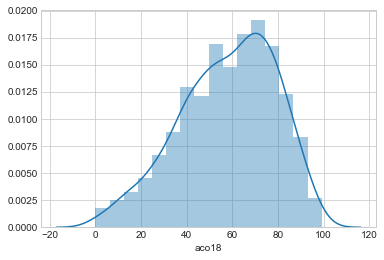

In [217]:
sns.distplot(data['aco18'].dropna())

C:\Users\Amarpreet Singh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


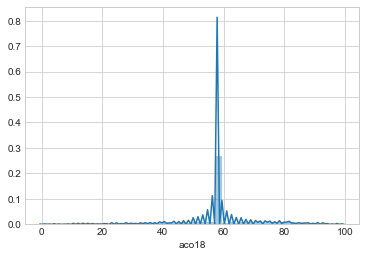

In [218]:
sns.distplot(new['aco18'].dropna())

In [219]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849 entries, 0 to 1848
Data columns (total 71 columns):
aco_num                    1849 non-null object
aco_name                   1849 non-null object
qualscore                  1641 non-null float64
qualperfshare              1849 non-null float64
n_ab                       1849 non-null int64
n_ben_age_0_64             1849 non-null int64
n_ben_age_65_74            1849 non-null int64
n_ben_age_75_84            1849 non-null int64
n_ben_age_85plus           1849 non-null int64
n_ben_female               1849 non-null int64
n_ben_male                 1849 non-null int64
n_ben_race_white           1849 non-null int64
n_ben_race_black           1849 non-null int64
n_ben_race_asian           1848 non-null float64
n_ben_race_hisp            1848 non-null float64
n_ben_race_native          1837 non-null float64
n_ben_race_other           1849 non-null int64
readm_rate_1000            1849 non-null float64
prov_rate_1000             1849 n

C:\Users\Amarpreet Singh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


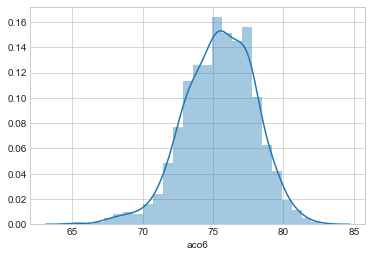

In [220]:
sns.distplot(new['aco6'].dropna())

In [221]:
fillwithmean = ['aco1',
 'aco2',
 'aco3',
 'aco4',
 'aco5',
 'aco6',
 'aco7',
 'aco34',
 'aco8',
 'aco35',
 'aco36',
 'aco37',
 'aco38',
 'aco11',
 'aco13',
 'aco14',
 'aco15',
 'aco16',
 'aco17',
 'aco44',
 'aco43',
 'aco12']

In [222]:
for i in fillwithmean:
    new[i].fillna(np.mean(new[i].dropna()), inplace=True)

In [224]:
nullvalcols = []
for i in new.columns:
    if (new[i].isnull().sum() !=0):
        nullvalcols.append(i)
    else:
        continue
nullvalcols

['qualscore',
 'n_ben_race_asian',
 'n_ben_race_hisp',
 'n_ben_race_native',
 'aco_state',
 'per_capita_exp_total_py',
 'aim',
 'met_qps']

In [225]:
new['n_ben_race_asian'].fillna(np.median(new['n_ben_race_asian'].dropna()), inplace=True)
new['n_ben_race_hisp'].fillna(np.median(new['n_ben_race_hisp'].dropna()), inplace=True)
new['n_ben_race_native'].fillna(np.median(new['n_ben_race_native'].dropna()), inplace=True)

In [226]:
new['met_qps'].value_counts()

1.0    896
0.0      8
Name: met_qps, dtype: int64

In [227]:
new['aim'].value_counts()

0.0    814
1.0     90
Name: aim, dtype: int64

In [228]:
sp.stats.pearsonr(data[data['met_qps'].notnull()]['met_qps'], data[data['met_qps'].notnull()]['aim'])

(0.03141955580826195, 0.3453715994781884)

In [229]:
sp.stats.pearsonr(data[data['met_qps'].notnull()]['met_qps'], data[data['met_qps'].notnull()]['qualscore'])

(0.6761756423930333, 8.152382860349369e-122)

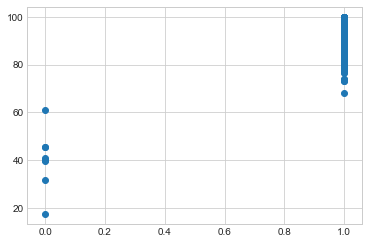

In [231]:
plt.scatter(new[new['met_qps'].notnull()]['met_qps'], new[new['met_qps'].notnull()]['qualscore'])

In [250]:
new.groupby('met_qps').qualscore.value_counts()

In [233]:
# pd.crosstab(new.qualscore, new.met_qps)

In [234]:
new.loc[(new.qualscore >=62), 'met_qps'] = 1.0
new.loc[(new.qualscore <62), 'met_qps'] = 0.0

In [244]:
new['aim'].fillna(-1.0, inplace=True)
new['qualscore'].fillna(-1.0, inplace=True)
new['met_qps'].fillna(-1.0, inplace=True)

In [245]:
nullvalcols = []
for i in new.columns:
    if (new[i].isnull().sum() !=0):
        nullvalcols.append(i)
    else:
        continue
nullvalcols

['aco_state', 'per_capita_exp_total_py']

In [246]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849 entries, 0 to 1848
Data columns (total 71 columns):
aco_num                    1849 non-null object
aco_name                   1849 non-null object
qualscore                  1849 non-null float64
qualperfshare              1849 non-null float64
n_ab                       1849 non-null int64
n_ben_age_0_64             1849 non-null int64
n_ben_age_65_74            1849 non-null int64
n_ben_age_75_84            1849 non-null int64
n_ben_age_85plus           1849 non-null int64
n_ben_female               1849 non-null int64
n_ben_male                 1849 non-null int64
n_ben_race_white           1849 non-null int64
n_ben_race_black           1849 non-null int64
n_ben_race_asian           1849 non-null float64
n_ben_race_hisp            1849 non-null float64
n_ben_race_native          1849 non-null float64
n_ben_race_other           1849 non-null int64
readm_rate_1000            1849 non-null float64
prov_rate_1000             1849 n

In [247]:
new.to_csv(r"C:\Users\Amarpreet Singh\Desktop\Innovaccer\mydata.csv", index=False)

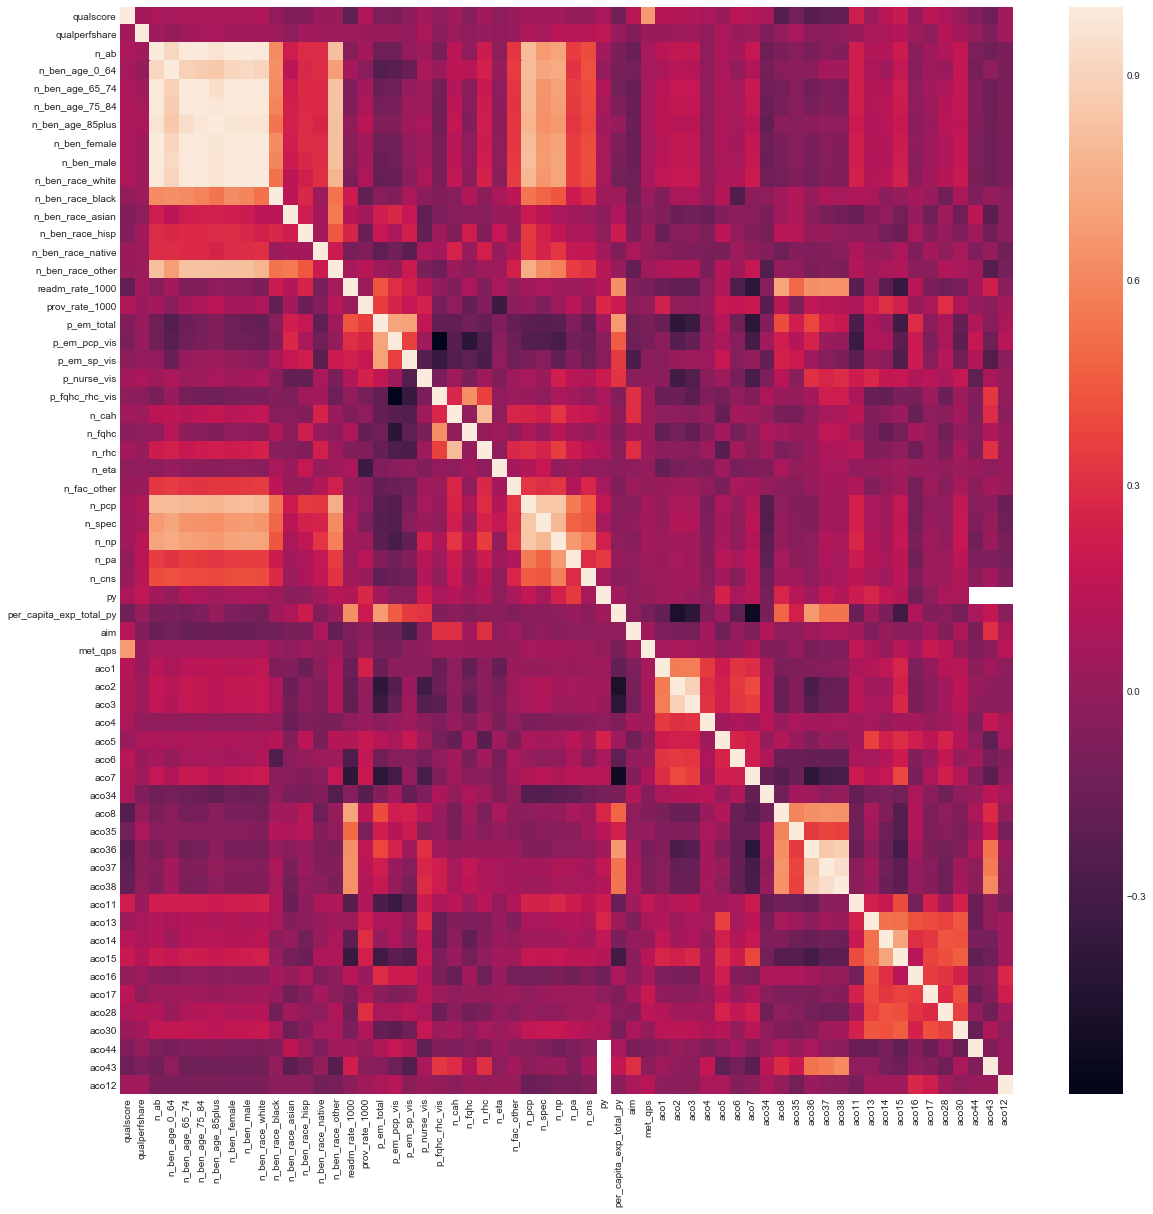

In [109]:
plt.figure(figsize=(20,20))
sns.heatmap(new.corr())
plt.show()

# 1. Correlation based Feature Selection/Importance

In [20]:
#the data which is saved with all values corrected and imputed
data= pd.read_csv(r"C:\Users\Amarpreet Singh\Downloads\Innovaccer\mydata.csv") 
display(data.head())
data.info()

,aco_num,aco_name,qualscore,qualperfshare,n_ab,n_ben_age_0_64,n_ben_age_65_74,n_ben_age_75_84,n_ben_age_85plus,n_ben_female,n_ben_male,n_ben_race_white,n_ben_race_black,n_ben_race_asian,n_ben_race_hisp,n_ben_race_native,n_ben_race_other,readm_rate_1000,prov_rate_1000,p_em_total,p_em_pcp_vis,p_em_sp_vis,p_nurse_vis,p_fqhc_rhc_vis,n_cah,n_fqhc,n_rhc,n_eta,n_fac_other,n_pcp,n_spec,n_np,n_pa,n_cns,py,aco_state,per_capita_exp_total_py,aim,met_qps,aco1,aco2,aco3,aco4,aco5,aco6,aco7,aco34,aco8,aco35,aco36,aco37,aco38,aco11,aco13,aco14,aco15,aco16,aco17,aco18,aco19,aco20,aco42,aco40,dm_comp,aco27,aco41,aco28,aco30,aco44,aco43,aco12
0,A67373,"Palm Beach Accountable Care Organization, LLC",100.0,50.0,36268,3178,11716,10013,5897,17789,13015,27497,2080,185.0,554.0,12.0,476,164.373717,797.330595,14776.18333,5253.676737,8814.096808,698.069748,10.340039,0,0,0,0,0,118,167,44,0,0,2013,NaN,NaN,-1.0,1.0,80.047763,92.724308,91.96299,83.458616,61.009147,75.466412,72.206622,26.979623,14.859779,18.31917,53.592754,77.291847,60.826128,87.113108,69.421184,70.496615,71.137542,72.481285,90.735196,57.980961,63.171823,68.953658,78.840045,7.347293,42.05067,17.463598,47.779777,71.121911,85.982447,67.31947,1.934492,76.236009
1,A38665,Chinese Community Accountable Care Organizatio...,100.0,50.0,13833,1129,4160,4393,1957,7067,4572,834,234,8922.0,102.0,2.0,1545,150.966680,831.345125,15622.09930,9401.238513,6059.281134,122.352734,39.226921,0,0,0,0,0,91,164,15,0,0,2013,NaN,NaN,-1.0,1.0,80.047763,92.724308,91.96299,83.458616,61.009147,75.466412,72.206622,26.979623,14.859779,18.31917,53.592754,77.291847,60.826128,87.113108,69.421184,70.496615,71.137542,72.481285,90.735196,57.980961,63.171823,68.953658,78.840045,7.347293,42.05067,17.463598,47.779777,71.121911,85.982447,67.31947,1.934492,76.236009
2,A64796,Summit Health Solutions,100.0,50.0,40595,5508,16680,10728,4420,21051,16285,35819,978,72.0,32.0,21.0,414,130.616074,792.869801,10056.24207,4590.886523,4042.809069,1406.217245,16.329233,0,0,0,0,11,255,200,140,2,1,2013,NaN,NaN,-1.0,1.0,80.047763,92.724308,91.96299,83.458616,61.009147,75.466412,72.206622,26.979623,14.859779,18.31917,53.592754,77.291847,60.826128,87.113108,69.421184,70.496615,71.137542,72.481285,90.735196,57.980961,63.171823,68.953658,78.840045,7.347293,42.05067,17.463598,47.779777,71.121911,85.982447,67.31947,1.934492,76.236009
3,A84830,"South Florida Accountable Care Organization,LLC",100.0,50.0,6150,903,2195,2007,1045,3636,2514,4342,471,30.0,1191.0,5.0,111,195.585530,761.496015,13112.59056,5543.483734,6996.111779,544.630619,28.364430,0,0,0,0,0,37,45,3,0,0,2013,NaN,NaN,-1.0,1.0,80.047763,92.724308,91.96299,83.458616,61.009147,75.466412,72.206622,26.979623,14.859779,18.31917,53.592754,77.291847,60.826128,87.113108,69.421184,70.496615,71.137542,72.481285,90.735196,57.980961,63.171823,68.953658,78.840045,7.347293,42.05067,17.463598,47.779777,71.121911,85.982447,67.31947,1.934492,76.236009
4,A76261,"Hackensack Physician-Hospital Alliance ACO, LLC",100.0,50.0,16383,1399,6106,4282,2124,8328,5583,12479,598,142.0,295.0,5.0,392,159.579668,824.780059,12513.99002,4770.948069,7212.271299,526.926631,3.844021,0,1,0,0,0,147,377,76,4,0,2013,NaN,NaN,-1.0,1.0,80.047763,92.724308,91.96299,83.458616,61.009147,75.466412,72.206622,26.979623,14.859779,18.31917,53.592754,77.291847,60.826128,87.113108,69.421184,70.496615,71.137542,72.481285,90.735196,57.980961,63.171823,68.953658,78.840045,7.347293,42.05067,17.463598,47.779777,71.121911,85.982447,67.31947,1.934492,76.236009


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849 entries, 0 to 1848
Data columns (total 71 columns):
aco_num                    1849 non-null object
aco_name                   1849 non-null object
qualscore                  1849 non-null float64
qualperfshare              1849 non-null float64
n_ab                       1849 non-null int64
n_ben_age_0_64             1849 non-null int64
n_ben_age_65_74            1849 non-null int64
n_ben_age_75_84            1849 non-null int64
n_ben_age_85plus           1849 non-null int64
n_ben_female               1849 non-null int64
n_ben_male                 1849 non-null int64
n_ben_race_white           1849 non-null int64
n_ben_race_black           1849 non-null int64
n_ben_race_asian           1849 non-null float64
n_ben_race_hisp            1849 non-null float64
n_ben_race_native          1849 non-null float64
n_ben_race_other           1849 non-null int64
readm_rate_1000            1849 non-null float64
prov_rate_1000             1849 n

In [21]:
df = data[data['per_capita_exp_total_py'].notnull()]
display(df.head())
df.info()

,aco_num,aco_name,qualscore,qualperfshare,n_ab,n_ben_age_0_64,n_ben_age_65_74,n_ben_age_75_84,n_ben_age_85plus,n_ben_female,n_ben_male,n_ben_race_white,n_ben_race_black,n_ben_race_asian,n_ben_race_hisp,n_ben_race_native,n_ben_race_other,readm_rate_1000,prov_rate_1000,p_em_total,p_em_pcp_vis,p_em_sp_vis,p_nurse_vis,p_fqhc_rhc_vis,n_cah,n_fqhc,n_rhc,n_eta,n_fac_other,n_pcp,n_spec,n_np,n_pa,n_cns,py,aco_state,per_capita_exp_total_py,aim,met_qps,aco1,aco2,aco3,aco4,aco5,aco6,aco7,aco34,aco8,aco35,aco36,aco37,aco38,aco11,aco13,aco14,aco15,aco16,aco17,aco18,aco19,aco20,aco42,aco40,dm_comp,aco27,aco41,aco28,aco30,aco44,aco43,aco12
220,A67373,"Palm Beach Accountable Care Organization, LLC",91.696429,50.0,34601,3077,13165,11565,6794,20074,14527,31248,1956,198.0,571.0,12.0,616,175.365345,825.782881,14814.26125,5145.037564,8911.748112,735.145354,22.330222,0,0,0,0,0,104,181,35,0,0,2014,Florida,12434.0,-1.0,1.0,80.047763,92.724308,91.96299,83.458616,61.009147,75.466412,72.206622,26.979623,14.859779,18.31917,53.592754,77.291847,60.826128,87.113108,69.421184,70.496615,71.137542,72.481285,90.735196,57.980961,63.171823,68.953658,78.840045,7.347293,42.05067,17.463598,47.779777,71.121911,85.982447,67.31947,1.934492,76.236009
221,A38665,Chinese Community Accountable Care Organizatio...,86.584821,50.0,11219,1120,4082,4230,1787,6782,4437,638,198,8769.0,90.0,3.0,1521,169.036335,836.756188,14983.55933,8687.352800,6080.442686,188.050214,27.713626,0,0,0,0,0,91,190,21,0,0,2014,"New York, New Jersey",9594.0,-1.0,1.0,80.047763,92.724308,91.96299,83.458616,61.009147,75.466412,72.206622,26.979623,14.859779,18.31917,53.592754,77.291847,60.826128,87.113108,69.421184,70.496615,71.137542,72.481285,90.735196,57.980961,63.171823,68.953658,78.840045,7.347293,42.05067,17.463598,47.779777,71.121911,85.982447,67.31947,1.934492,76.236009
222,A64796,Summit Health Solutions,93.136161,50.0,37174,5364,16886,10524,4400,20915,16259,35572,968,84.0,36.0,19.0,495,151.490640,811.301132,10253.07392,4507.135751,3842.988083,1884.309195,18.640895,0,0,2,0,26,249,208,157,2,1,2014,Tennessee,8305.0,-1.0,1.0,80.047763,92.724308,91.96299,83.458616,61.009147,75.466412,72.206622,26.979623,14.859779,18.31917,53.592754,77.291847,60.826128,87.113108,69.421184,70.496615,71.137542,72.481285,90.735196,57.980961,63.171823,68.953658,78.840045,7.347293,42.05067,17.463598,47.779777,71.121911,85.982447,67.31947,1.934492,76.236009
223,A84830,"South Florida Accountable Care Organization,LLC",87.265625,50.0,6850,1010,2453,2166,1221,4138,2712,4733,530,37.0,1439.0,8.0,103,237.935844,777.963738,13106.54224,5686.439507,6769.621080,599.841750,50.639907,0,0,0,0,0,0,0,0,0,0,2014,Florida,18267.0,-1.0,1.0,80.047763,92.724308,91.96299,83.458616,61.009147,75.466412,72.206622,26.979623,14.859779,18.31917,53.592754,77.291847,60.826128,87.113108,69.421184,70.496615,71.137542,72.481285,90.735196,57.980961,63.171823,68.953658,78.840045,7.347293,42.05067,17.463598,47.779777,71.121911,85.982447,67.31947,1.934492,76.236009
224,A76261,"Hackensack Physician-Hospital Alliance ACO, LLC",89.430804,50.0,15603,1731,6863,4638,2371,9298,6305,13796,649,202.0,409.0,8.0,539,198.485924,829.903004,12210.38858,4549.512898,7052.998483,603.127130,4.750071,0,1,0,0,5,112,382,73,5,1,2014,"New Jersey, New York",12672.0,-1.0,1.0,80.047763,92.724308,91.96299,83.458616,61.009147,75.466412,72.206622,26.979623,14.859779,18.31917,53.592754,77.291847,60.826128,87.113108,69.421184,70.496615,71.137542,72.481285,90.735196,57.980961,63.171823,68.953658,78.840045,7.347293,42.05067,17.463598,47.779777,71.121911,85.982447,67.31947,1.934492,76.236009


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1629 entries, 220 to 1848
Data columns (total 71 columns):
aco_num                    1629 non-null object
aco_name                   1629 non-null object
qualscore                  1629 non-null float64
qualperfshare              1629 non-null float64
n_ab                       1629 non-null int64
n_ben_age_0_64             1629 non-null int64
n_ben_age_65_74            1629 non-null int64
n_ben_age_75_84            1629 non-null int64
n_ben_age_85plus           1629 non-null int64
n_ben_female               1629 non-null int64
n_ben_male                 1629 non-null int64
n_ben_race_white           1629 non-null int64
n_ben_race_black           1629 non-null int64
n_ben_race_asian           1629 non-null float64
n_ben_race_hisp            1629 non-null float64
n_ben_race_native          1629 non-null float64
n_ben_race_other           1629 non-null int64
readm_rate_1000            1629 non-null float64
prov_rate_1000             1629

In [27]:
Imp_feats = []
for x,y in zip(df.corr()['per_capita_exp_total_py'].index, df.corr()['per_capita_exp_total_py'].values):
    if (abs(y) >0.3):
        Imp_feats.append(x)
    else:
        continue

Imp_feats

['readm_rate_1000',
 'p_em_total',
 'p_em_pcp_vis',
 'p_em_sp_vis',
 'p_nurse_vis',
 'per_capita_exp_total_py',
 'aco2',
 'aco3',
 'aco7',
 'aco8',
 'aco36',
 'aco37',
 'aco38']

This implies the **important features** here are (as indicated by **Correlation** ): **'readm_rate_1000', 'p_em_total',  'p_em_pcp_vis',  'p_em_sp_vis',  'p_nurse_vis',  'per_capita_exp_total_py',  'aco2',  'aco3',  'aco7',  'aco8',  'aco36',  'aco37',  'aco38'] as compared to other features. **

# 2. Feature Importance by Tree-Based Models

In [53]:
X = df.drop(['aco_num', 'aco_name', 'aco_state', 'per_capita_exp_total_py'], axis=1).values.astype(np.float)
X = scaler.fit_transform(X)
X, X.shape

(array([[ 3.71093379e-01, -1.97036483e-01,  9.22974480e-01, ...,
         -2.61718701e-15,  2.07475506e-15, -2.02701112e-15],
        [ 2.13391138e-01, -1.97036483e-01, -3.84501126e-01, ...,
         -2.61718701e-15,  2.07475506e-15, -2.02701112e-15],
        [ 4.15511694e-01, -1.97036483e-01,  1.06685160e+00, ...,
         -2.61718701e-15,  2.07475506e-15, -2.02701112e-15],
        ...,
        [ 6.27273435e-01, -1.97036483e-01, -5.23289701e-01, ...,
          1.19534893e+00,  3.43624636e+00, -3.14488824e+00],
        [ 6.27273435e-01,  5.51421673e+00,  1.26099903e+00, ...,
          4.06145427e-02, -1.93647666e+00, -1.40612826e+00],
        [ 6.27273435e-01,  5.51421673e+00, -6.76561048e-01, ...,
         -2.35172990e+00, -6.77034367e-02,  7.99058727e-01]]), (1629, 67))

In [54]:
y = df['per_capita_exp_total_py'].values
y, y.shape

(array([12434.,  9594.,  8305., ..., 13366., 10951., 13679.]), (1629,))

In [55]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
rfr = RandomForestRegressor().fit(X, y)
xgbr = XGBRegressor().fit(X,y)

In [83]:
#for hyperparameter tuning
from sklearn.grid_search import GridSearchCV
parameters = {'n_estimators': [10,120, 100, 140,500,1000], 'max_depth':[2,3,5,7,9,10]}
print("parameters:", parameters)

parameters: {'n_estimators': [10, 120, 100, 140, 500, 1000], 'max_depth': [2, 3, 5, 7, 9, 10]}


In [87]:
# grid_search = GridSearchCV(estimator=xgbr, param_grid=parameters, cv=5, n_jobs=-1)
# grid_search.fit(X, y)
# print("Best score: %0.3f" % grid_search.best_score_)
# print("Best parameters set:")
# best_parameters=grid_search.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.755
Best parameters set:
	max_depth: 2
	n_estimators: 1000


In [86]:
# grid_search = GridSearchCV(estimator=rfr, param_grid=parameters, cv=5, n_jobs=-1)
# grid_search.fit(X, y)
# print("Best score: %0.3f" % grid_search.best_score_)
# print("Best parameters set:")
# best_parameters=grid_search.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print("\t%s: %r" % (param_name, best_parameters[param_name]))

	max_depth: 10
	n_estimators: 120


In [88]:
rfr = RandomForestRegressor(max_depth = 10, n_estimators= 120 ).fit(X, y)
xgbr = XGBRegressor(max_depth = 2, n_estimators= 1000).fit(X,y)

In [89]:
print(xgbr.feature_importances_, len(xgbr.feature_importances_))

[0.01827411 0.00169205 0.0213198  0.01928934 0.03045685 0.01827411
 0.07174281 0.01116751 0.01319797 0.02165821 0.02368866 0.04839256
 0.02098139 0.01962775 0.0213198  0.05177665 0.03282572 0.035533
 0.0392555  0.05414551 0.04331641 0.01928934 0.00270728 0.00575296
 0.0037225  0.0037225  0.00406091 0.02165821 0.02436548 0.01353638
 0.00406091 0.00304569 0.00507614 0.         0.         0.0071066
 0.00676819 0.0108291  0.01150592 0.00846024 0.00609137 0.01150592
 0.01285956 0.02165821 0.0108291  0.01015228 0.00913706 0.00778342
 0.00270728 0.00642978 0.00609137 0.00947546 0.01049069 0.01015228
 0.01015228 0.00609137 0.00406091 0.01489002 0.00067682 0.00236887
 0.00676819 0.00609137 0.00778342 0.01285956 0.01015228 0.00439932
 0.00473773] 67


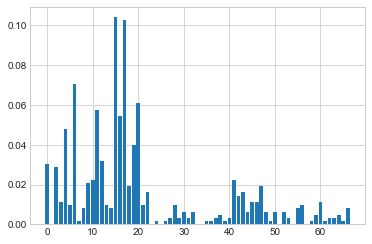

In [57]:
plt.bar(range(len(xgbr.feature_importances_)), xgbr.feature_importances_)
plt.show()

In [91]:
print(rfr.feature_importances_, len(rfr.feature_importances_))

[3.41973067e-03 1.94144114e-04 1.43353584e-03 4.35466271e-03
 5.34323732e-03 2.30758808e-03 1.26072948e-02 3.28620872e-03
 2.19664851e-03 6.44134656e-03 6.52301063e-03 1.17006041e-02
 1.33650364e-02 7.16496076e-03 4.29496621e-03 3.77852599e-01
 1.56851718e-02 1.99105499e-01 6.76181073e-02 2.02828756e-02
 4.70874710e-02 5.13866505e-03 1.94123818e-03 7.31692917e-04
 1.31836466e-03 6.92927718e-05 2.35687965e-03 3.41223881e-03
 4.50380081e-03 4.79989065e-03 3.02016296e-03 1.60164089e-03
 1.35239852e-03 3.22062230e-04 6.73167467e-04 1.00255027e-03
 2.54263173e-02 1.75693313e-02 1.70885931e-03 1.26247338e-03
 7.18344279e-03 2.69149004e-02 1.73232535e-03 7.73073300e-03
 2.73334629e-03 3.01890098e-03 8.08762766e-03 7.72184375e-03
 2.32299347e-03 9.72965850e-03 2.43133480e-03 1.08166868e-03
 1.41996558e-03 2.58974314e-03 6.26516377e-03 1.27620919e-03
 2.16462668e-03 9.09465360e-04 7.73212787e-04 1.53358116e-03
 4.37115106e-03 1.35861495e-03 1.05053707e-03 1.71980521e-03
 7.55475399e-04 1.553531

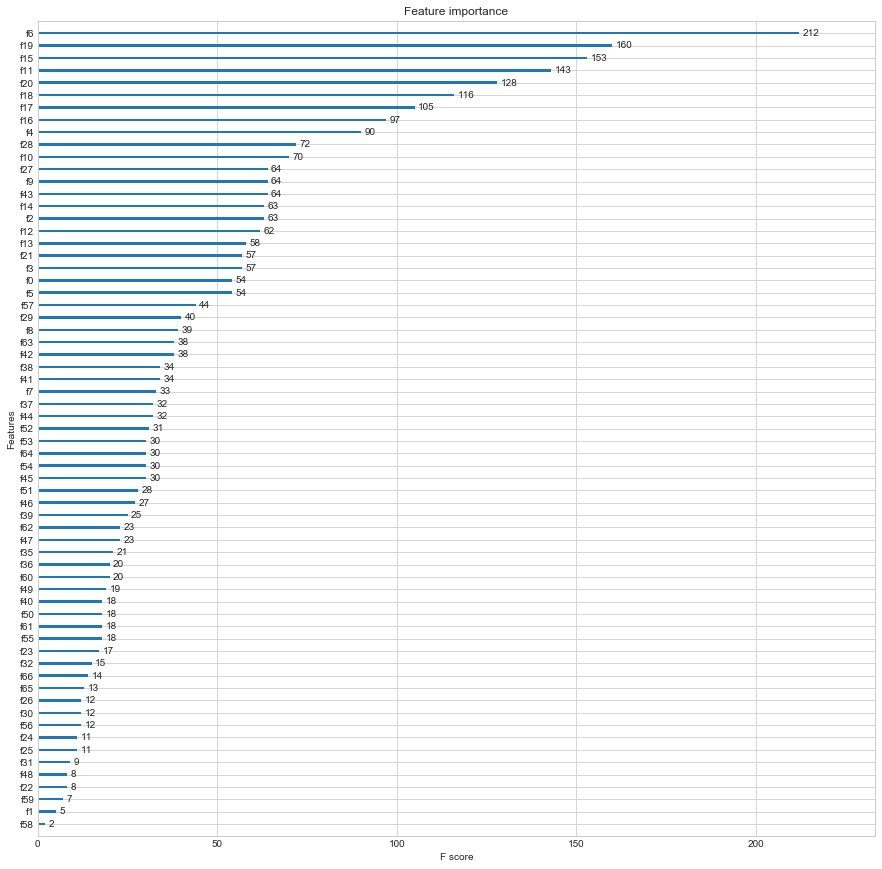

In [92]:
from xgboost import plot_importance
fig, ax = plt.subplots(1,1,figsize=(15,15))
plot_importance(xgbr, ax = ax)
plt.show()

In [93]:
Indep_vars = df.drop(['aco_num', 'aco_name', 'aco_state', 'per_capita_exp_total_py'], axis=1).columns
Indep_vars, len(Indep_vars)

(Index(['qualscore', 'qualperfshare', 'n_ab', 'n_ben_age_0_64',
        'n_ben_age_65_74', 'n_ben_age_75_84', 'n_ben_age_85plus',
        'n_ben_female', 'n_ben_male', 'n_ben_race_white', 'n_ben_race_black',
        'n_ben_race_asian', 'n_ben_race_hisp', 'n_ben_race_native',
        'n_ben_race_other', 'readm_rate_1000', 'prov_rate_1000', 'p_em_total',
        'p_em_pcp_vis', 'p_em_sp_vis', 'p_nurse_vis', 'p_fqhc_rhc_vis', 'n_cah',
        'n_fqhc', 'n_rhc', 'n_eta', 'n_fac_other', 'n_pcp', 'n_spec', 'n_np',
        'n_pa', 'n_cns', 'py', 'aim', 'met_qps', 'aco1', 'aco2', 'aco3', 'aco4',
        'aco5', 'aco6', 'aco7', 'aco34', 'aco8', 'aco35', 'aco36', 'aco37',
        'aco38', 'aco11', 'aco13', 'aco14', 'aco15', 'aco16', 'aco17', 'aco18',
        'aco19', 'aco20', 'aco42', 'aco40', 'dm_comp', 'aco27', 'aco41',
        'aco28', 'aco30', 'aco44', 'aco43', 'aco12'],
       dtype='object'), 67)

In [94]:
nums = ['f'+str(i) for i in range(0,67)]
len(nums)

67

In [95]:
featdict = {'F_number': nums, 'Features': Indep_vars}
feat_df = pd.DataFrame.from_dict(featdict)
feat_df.head()

,F_number,Features
0,f0,qualscore
1,f1,qualperfshare
2,f2,n_ab
3,f3,n_ben_age_0_64
4,f4,n_ben_age_65_74


In [96]:
feat_df['xgbr_score'] = xgbr.feature_importances_
feat_df['rfr_score'] = rfr.feature_importances_
feat_df

,F_number,Features,xgbr_score,rfr_score
0,f0,qualscore,0.018274,0.003420
1,f1,qualperfshare,0.001692,0.000194
2,f2,n_ab,0.021320,0.001434
3,f3,n_ben_age_0_64,0.019289,0.004355
4,f4,n_ben_age_65_74,0.030457,0.005343
5,f5,n_ben_age_75_84,0.018274,0.002308
6,f6,n_ben_age_85plus,0.071743,0.012607
7,f7,n_ben_female,0.011168,0.003286
8,f8,n_ben_male,0.013198,0.002197
9,f9,n_ben_race_white,0.021658,0.006441


In [97]:
Import_feats_xgbr = feat_df.sort_values('xgbr_score', ascending= False)['Features'].values
Import_feats_xgbr

array(['n_ben_age_85plus', 'p_em_sp_vis', 'readm_rate_1000',
       'n_ben_race_asian', 'p_nurse_vis', 'p_em_pcp_vis', 'p_em_total',
       'prov_rate_1000', 'n_ben_age_65_74', 'n_spec', 'n_ben_race_black',
       'aco8', 'n_pcp', 'n_ben_race_white', 'n_ben_race_other', 'n_ab',
       'n_ben_race_hisp', 'n_ben_race_native', 'n_ben_age_0_64',
       'p_fqhc_rhc_vis', 'qualscore', 'n_ben_age_75_84', 'aco42', 'n_np',
       'n_ben_male', 'aco30', 'aco34', 'aco7', 'aco4', 'n_ben_female',
       'aco3', 'aco35', 'aco16', 'aco44', 'aco17', 'aco36', 'aco18',
       'aco15', 'aco37', 'aco5', 'aco28', 'aco38', 'aco1', 'aco2',
       'aco27', 'aco13', 'aco6', 'aco19', 'aco14', 'aco41', 'n_fqhc',
       'py', 'aco12', 'aco43', 'aco20', 'n_pa', 'n_fac_other', 'n_eta',
       'n_rhc', 'n_cns', 'aco11', 'n_cah', 'dm_comp', 'qualperfshare',
       'aco40', 'met_qps', 'aim'], dtype=object)

In [98]:
Import_feats_rfr = feat_df.sort_values('rfr_score', ascending=False)['Features'].values
Import_feats_rfr

array(['readm_rate_1000', 'p_em_total', 'p_em_pcp_vis', 'p_nurse_vis',
       'aco7', 'aco2', 'p_em_sp_vis', 'aco3', 'prov_rate_1000',
       'n_ben_race_hisp', 'n_ben_age_85plus', 'n_ben_race_asian', 'aco13',
       'aco37', 'aco8', 'aco38', 'aco6', 'n_ben_race_native',
       'n_ben_race_black', 'n_ben_race_white', 'aco18', 'n_ben_age_65_74',
       'p_fqhc_rhc_vis', 'n_np', 'n_spec', 'aco27', 'n_ben_age_0_64',
       'n_ben_race_other', 'qualscore', 'n_pcp', 'n_ben_female', 'n_pa',
       'aco36', 'aco35', 'aco17', 'aco14', 'n_fac_other', 'aco11',
       'n_ben_age_75_84', 'n_ben_male', 'aco20', 'n_cah', 'aco34',
       'aco30', 'aco4', 'n_cns', 'aco43', 'dm_comp', 'n_ab', 'aco16',
       'aco41', 'py', 'n_rhc', 'aco19', 'aco5', 'aco12', 'aco15', 'aco28',
       'aco1', 'aco42', 'aco40', 'aco44', 'n_fqhc', 'met_qps', 'aim',
       'qualperfshare', 'n_eta'], dtype=object)

**So, these are the important features (sorted from most important to least important according to XGBoostRegressor and RandomForestRegressor)**

# 3. Regression Analysis

## (a) Estimating Regression Coefficients

In [105]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.7505754707089705

In [106]:
reg.intercept_ 

10710.371177596287

In [107]:
reg.coef_, len(reg.coef_)

(array([-2.71955231e+02, -1.17032302e+02,  1.42374743e+16, -2.30938193e+15,
        -6.55068966e+15, -3.86590621e+15, -1.82667695e+15, -4.74944328e+06,
        -3.52693892e+06, -4.47942500e+04, -5.75237500e+03, -2.25678125e+03,
        -9.70250000e+02, -7.30000000e+01, -1.78000000e+03,  9.35062500e+02,
        -1.12000000e+02, -1.11705875e+05,  8.75601250e+04,  7.88630000e+04,
         4.21290000e+04,  6.44686562e+04,  9.00000000e+00, -1.49500000e+02,
         4.45000000e+01, -2.06500000e+02,  6.25000000e-02,  1.35000000e+01,
         2.30500000e+02,  6.50000000e+01, -1.20000000e+01, -3.40000000e+01,
         1.32000000e+02,  1.12500000e+00,  1.90000000e+02,  7.13750000e+01,
        -3.44375000e+02,  4.17500000e+01, -8.62500000e+00,  7.05000000e+01,
         4.47500000e+01, -1.15500000e+02, -2.30000000e+01, -3.78875000e+02,
        -8.12500000e+00,  3.80687500e+02, -2.02250000e+02,  3.39125000e+02,
         3.75000000e+01,  3.90000000e+01,  3.75000000e+01,  1.96000000e+02,
        -1.5

In [108]:
abs_coefs = [abs(x) for x in reg.coef_]
abs_coefs , len(abs_coefs)

([271.9552313239536,
  117.03230203298384,
  1.4237474341479466e+16,
  2309381925817252.5,
  6550689661240490.0,
  3865906209625905.0,
  1826676954261929.5,
  4749443.279320819,
  3526938.9212945374,
  44794.25,
  5752.375,
  2256.78125,
  970.25,
  73.0,
  1780.0,
  935.0625,
  112.0,
  111705.875,
  87560.125,
  78863.0,
  42129.0,
  64468.65625,
  9.0,
  149.5,
  44.5,
  206.5,
  0.0625,
  13.5,
  230.5,
  65.0,
  12.0,
  34.0,
  132.0,
  1.125,
  190.0,
  71.375,
  344.375,
  41.75,
  8.625,
  70.5,
  44.75,
  115.5,
  23.0,
  378.875,
  8.125,
  380.6875,
  202.25,
  339.125,
  37.5,
  39.0,
  37.5,
  196.0,
  153.0,
  5.125,
  15.0,
  127.75,
  137.25,
  12.0,
  11.125,
  295.0,
  152.25,
  315.5,
  81.5,
  79.25,
  40.75,
  92.375,
  28.90625],
 67)

In [109]:
coeffdict = {'Independent_Variables': Indep_vars, 'Regression_Coeffs': abs_coefs}
coeff_df = pd.DataFrame.from_dict(coeffdict)
coeff_df.head()

,Independent_Variables,Regression_Coeffs
0,qualscore,2.719552e+02
1,qualperfshare,1.170323e+02
2,n_ab,1.423747e+16
3,n_ben_age_0_64,2.309382e+15
4,n_ben_age_65_74,6.550690e+15


In [110]:
coeff_df = coeff_df.sort_values('Regression_Coeffs', ascending=False)
coeff_df

,Independent_Variables,Regression_Coeffs
2,n_ab,1.423747e+16
4,n_ben_age_65_74,6.550690e+15
5,n_ben_age_75_84,3.865906e+15
3,n_ben_age_0_64,2.309382e+15
6,n_ben_age_85plus,1.826677e+15
7,n_ben_female,4.749443e+06
8,n_ben_male,3.526939e+06
17,p_em_total,1.117059e+05
18,p_em_pcp_vis,8.756012e+04
19,p_em_sp_vis,7.886300e+04


In [111]:
Imp_vars = coeff_df['Independent_Variables'].values
Imp_vars

array(['n_ab', 'n_ben_age_65_74', 'n_ben_age_75_84', 'n_ben_age_0_64',
       'n_ben_age_85plus', 'n_ben_female', 'n_ben_male', 'p_em_total',
       'p_em_pcp_vis', 'p_em_sp_vis', 'p_fqhc_rhc_vis',
       'n_ben_race_white', 'p_nurse_vis', 'n_ben_race_black',
       'n_ben_race_asian', 'n_ben_race_other', 'n_ben_race_hisp',
       'readm_rate_1000', 'aco36', 'aco8', 'aco2', 'aco38', 'aco41',
       'dm_comp', 'qualscore', 'n_spec', 'n_eta', 'aco37', 'aco15',
       'met_qps', 'aco16', 'aco27', 'n_fqhc', 'aco20', 'py', 'aco19',
       'qualperfshare', 'aco7', 'prov_rate_1000', 'aco43', 'aco28',
       'aco30', 'n_ben_race_native', 'aco1', 'aco5', 'n_np', 'aco6',
       'n_rhc', 'aco3', 'aco44', 'aco13', 'aco14', 'aco11', 'n_cns',
       'aco12', 'aco34', 'aco18', 'n_pcp', 'aco42', 'n_pa', 'aco40',
       'n_cah', 'aco4', 'aco35', 'aco17', 'aim', 'n_fac_other'],
      dtype=object)

**So, it's shown by above mathematics that most important feature for 'per_capita_exp_total_py' as dependent variable in the regression analysis is 'n_ab' and the least important is 'n_fac_other' as they are arranged according to their decreasing value of regression coefficients hence decreasing measure of their importance.**

In [112]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     71.32
Date:                Sat, 24 Nov 2018   Prob (F-statistic):               0.00
Time:                        22:12:11   Log-Likelihood:                -13994.
No. Observations:                1629   AIC:                         2.812e+04
Df Residuals:                    1562   BIC:                         2.848e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.071e+04     32.936    325.168      0.0

## (b). Calculating R-squared when each variable is added to a model that already contains some of the other variables:
the associated change in R-squared represents the improvement in the goodness-of-fit that is due solely to that last variable 
after all of the other variables have been accounted for.

**Forward selection**:
We start with a null model (no features), we then fit 67 simple linear regressions and add to the null model the variable that results in the lowest RSS.

In [49]:
Indep_vars

Index(['qualscore', 'qualperfshare', 'n_ab', 'n_ben_age_0_64',
       'n_ben_age_65_74', 'n_ben_age_75_84', 'n_ben_age_85plus',
       'n_ben_female', 'n_ben_male', 'n_ben_race_white', 'n_ben_race_black',
       'n_ben_race_asian', 'n_ben_race_hisp', 'n_ben_race_native',
       'n_ben_race_other', 'readm_rate_1000', 'prov_rate_1000', 'p_em_total',
       'p_em_pcp_vis', 'p_em_sp_vis', 'p_nurse_vis', 'p_fqhc_rhc_vis', 'n_cah',
       'n_fqhc', 'n_rhc', 'n_eta', 'n_fac_other', 'n_pcp', 'n_spec', 'n_np',
       'n_pa', 'n_cns', 'py', 'aim', 'met_qps', 'aco1', 'aco2', 'aco3', 'aco4',
       'aco5', 'aco6', 'aco7', 'aco34', 'aco8', 'aco35', 'aco36', 'aco37',
       'aco38', 'aco11', 'aco13', 'aco14', 'aco15', 'aco16', 'aco17', 'aco18',
       'aco19', 'aco20', 'aco42', 'aco40', 'dm_comp', 'aco27', 'aco41',
       'aco28', 'aco30', 'aco44', 'aco43', 'aco12'],
      dtype='object')

In [169]:
data = df.loc[:, list(Indep_vars)+['per_capita_exp_total_py']]
data.head()

,qualscore,qualperfshare,n_ab,n_ben_age_0_64,n_ben_age_65_74,n_ben_age_75_84,n_ben_age_85plus,n_ben_female,n_ben_male,n_ben_race_white,n_ben_race_black,n_ben_race_asian,n_ben_race_hisp,n_ben_race_native,n_ben_race_other,readm_rate_1000,prov_rate_1000,p_em_total,p_em_pcp_vis,p_em_sp_vis,p_nurse_vis,p_fqhc_rhc_vis,n_cah,n_fqhc,n_rhc,n_eta,n_fac_other,n_pcp,n_spec,n_np,n_pa,n_cns,py,aim,met_qps,aco1,aco2,aco3,aco4,aco5,aco6,aco7,aco34,aco8,aco35,aco36,aco37,aco38,aco11,aco13,aco14,aco15,aco16,aco17,aco18,aco19,aco20,aco42,aco40,dm_comp,aco27,aco41,aco28,aco30,aco44,aco43,aco12,per_capita_exp_total_py
220,91.696429,50.0,34601,3077,13165,11565,6794,20074,14527,31248,1956,198.0,571.0,12.0,616,175.365345,825.782881,14814.26125,5145.037564,8911.748112,735.145354,22.330222,0,0,0,0,0,104,181,35,0,0,2014,-1.0,1.0,80.047763,92.724308,91.96299,83.458616,61.009147,75.466412,72.206622,26.979623,14.859779,18.31917,53.592754,77.291847,60.826128,87.113108,69.421184,70.496615,71.137542,72.481285,90.735196,57.980961,63.171823,68.953658,78.840045,7.347293,42.05067,17.463598,47.779777,71.121911,85.982447,67.31947,1.934492,76.236009,12434.0
221,86.584821,50.0,11219,1120,4082,4230,1787,6782,4437,638,198,8769.0,90.0,3.0,1521,169.036335,836.756188,14983.55933,8687.352800,6080.442686,188.050214,27.713626,0,0,0,0,0,91,190,21,0,0,2014,-1.0,1.0,80.047763,92.724308,91.96299,83.458616,61.009147,75.466412,72.206622,26.979623,14.859779,18.31917,53.592754,77.291847,60.826128,87.113108,69.421184,70.496615,71.137542,72.481285,90.735196,57.980961,63.171823,68.953658,78.840045,7.347293,42.05067,17.463598,47.779777,71.121911,85.982447,67.31947,1.934492,76.236009,9594.0
222,93.136161,50.0,37174,5364,16886,10524,4400,20915,16259,35572,968,84.0,36.0,19.0,495,151.490640,811.301132,10253.07392,4507.135751,3842.988083,1884.309195,18.640895,0,0,2,0,26,249,208,157,2,1,2014,-1.0,1.0,80.047763,92.724308,91.96299,83.458616,61.009147,75.466412,72.206622,26.979623,14.859779,18.31917,53.592754,77.291847,60.826128,87.113108,69.421184,70.496615,71.137542,72.481285,90.735196,57.980961,63.171823,68.953658,78.840045,7.347293,42.05067,17.463598,47.779777,71.121911,85.982447,67.31947,1.934492,76.236009,8305.0
223,87.265625,50.0,6850,1010,2453,2166,1221,4138,2712,4733,530,37.0,1439.0,8.0,103,237.935844,777.963738,13106.54224,5686.439507,6769.621080,599.841750,50.639907,0,0,0,0,0,0,0,0,0,0,2014,-1.0,1.0,80.047763,92.724308,91.96299,83.458616,61.009147,75.466412,72.206622,26.979623,14.859779,18.31917,53.592754,77.291847,60.826128,87.113108,69.421184,70.496615,71.137542,72.481285,90.735196,57.980961,63.171823,68.953658,78.840045,7.347293,42.05067,17.463598,47.779777,71.121911,85.982447,67.31947,1.934492,76.236009,18267.0
224,89.430804,50.0,15603,1731,6863,4638,2371,9298,6305,13796,649,202.0,409.0,8.0,539,198.485924,829.903004,12210.38858,4549.512898,7052.998483,603.127130,4.750071,0,1,0,0,5,112,382,73,5,1,2014,-1.0,1.0,80.047763,92.724308,91.96299,83.458616,61.009147,75.466412,72.206622,26.979623,14.859779,18.31917,53.592754,77.291847,60.826128,87.113108,69.421184,70.496615,71.137542,72.481285,90.735196,57.980961,63.171823,68.953658,78.840045,7.347293,42.05067,17.463598,47.779777,71.121911,85.982447,67.31947,1.934492,76.236009,12672.0


In [172]:
len(data.columns)

68

In [173]:
def evaluateModel(model):
    print("RSS = ", ((data['per_capita_exp_total_py'] - model.predict())**2).sum())
    print("R2 = ", model.rsquared)

In [174]:
model1 = sm.OLS(y, data['qualscore']).fit()
display(evaluateModel(model1))
model1.summary().tables[1]

RSS =  37798408635.37645
R2 =  0.8090237228147363


None

,coef,std err,t,P>|t|,[0.025,0.975]
qualscore,115.2713,1.388,83.046,0.000,112.549,117.994


**In the same way we keep on adding new features and see if RSS is being sufficiently reduced.** 

In [176]:
model2 = sm.OLS(y, data.loc[:, ['qualperfshare','qualscore']]).fit()
display(evaluateModel(model2))
model2.summary().tables[1]

RSS =  12309888647.642761
R2 =  0.9378043470250308


None

,coef,std err,t,P>|t|,[0.025,0.975]
qualperfshare,205.1361,3.534,58.042,0.000,198.204,212.068
qualscore,2.5335,2.098,1.208,0.227,-1.581,6.648


In [177]:
model3 = sm.OLS(y, data.loc[:, ['qualperfshare','qualscore', 'n_ab']]).fit()
display(evaluateModel(model3))
model3.summary().tables[1]

RSS =  12235396496.607224
R2 =  0.9381807182585798


None

,coef,std err,t,P>|t|,[0.025,0.975]
qualperfshare,208.5539,3.688,56.545,0.000,201.320,215.788
qualscore,3.0706,2.099,1.463,0.144,-1.046,7.188
n_ab,-0.0120,0.004,-3.146,0.002,-0.019,-0.005


In [178]:
model4 = sm.OLS(y, data.loc[:, ['qualperfshare','qualscore', 'n_ab', 'n_ben_age_0_64']]).fit()
display(evaluateModel(model4))
model4.summary().tables[1]

RSS =  12230219966.534224
R2 =  0.9382068726517877


None

,coef,std err,t,P>|t|,[0.025,0.975]
qualperfshare,208.1735,3.717,56.005,0.000,200.883,215.464
qualscore,3.1604,2.102,1.504,0.133,-0.963,7.283
n_ab,-0.0193,0.010,-2.011,0.045,-0.038,-0.000
n_ben_age_0_64,0.0488,0.059,0.829,0.407,-0.067,0.164


In [180]:
model5 = sm.OLS(y, data.iloc[:, 0:15]).fit()
display(evaluateModel(model5))
model5.summary().tables[1]

RSS =  9475194543.979717
R2 =  0.9521266253013155


None

,coef,std err,t,P>|t|,[0.025,0.975]
qualscore,4.3456,1.865,2.331,0.020,0.688,8.003
qualperfshare,201.5724,3.384,59.562,0.000,194.934,208.210
n_ab,1526.9380,627.490,2.433,0.015,296.157,2757.719
n_ben_age_0_64,381.3552,156.873,2.431,0.015,73.659,689.052
n_ben_age_65_74,381.4816,156.868,2.432,0.015,73.795,689.169
n_ben_age_75_84,380.3855,156.880,2.425,0.015,72.676,688.096
n_ben_age_85plus,383.7157,156.869,2.446,0.015,76.028,691.403
n_ben_female,-1903.2518,784.261,-2.427,0.015,-3441.529,-364.975
n_ben_male,-1903.2046,784.273,-2.427,0.015,-3441.504,-364.906
n_ben_race_white,-5.1934,11.909,-0.436,0.663,-28.553,18.166


In [181]:
model6 = sm.OLS(y, data.iloc[:, 0:67]).fit()
display(evaluateModel(model6))
model6.summary().tables[1]

RSS =  2764359311.5773954
R2 =  0.9860330879212367


None

,coef,std err,t,P>|t|,[0.025,0.975]
qualscore,-7.3874,5.689,-1.299,0.194,-18.546,3.772
qualperfshare,-23.0846,8.389,-2.752,0.006,-39.540,-6.629
n_ab,389.1881,352.274,1.105,0.269,-301.791,1080.168
n_ben_age_0_64,96.9462,88.069,1.101,0.271,-75.799,269.692
n_ben_age_65_74,97.3395,88.066,1.105,0.269,-75.400,270.079
n_ben_age_75_84,96.6111,88.073,1.097,0.273,-76.143,269.365
n_ben_age_85plus,98.2913,88.066,1.116,0.265,-74.449,271.032
n_ben_female,-484.3910,440.328,-1.100,0.271,-1348.087,379.305
n_ben_male,-484.3241,440.336,-1.100,0.272,-1348.035,379.387
n_ben_race_white,-2.0488,6.813,-0.301,0.764,-15.412,11.314


In [186]:
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

In [187]:
result_df = results_summary_to_dataframe(model6)
result_df

,coeff,pvals,conf_lower,conf_higher
qualscore,-7.387354,1.942975e-01,-18.546271,3.771563
qualperfshare,-23.084564,5.998869e-03,-39.540400,-6.628729
n_ab,389.188128,2.694215e-01,-301.791360,1080.167617
n_ben_age_0_64,96.946192,2.711533e-01,-75.799404,269.691789
n_ben_age_65_74,97.339464,2.691972e-01,-75.399769,270.078697
n_ben_age_75_84,96.611134,2.728364e-01,-76.143091,269.365359
n_ben_age_85plus,98.291338,2.645486e-01,-74.449318,271.031994
n_ben_female,-484.390967,2.714715e-01,-1348.086538,379.304604
n_ben_male,-484.324054,2.715462e-01,-1348.035009,379.386902
n_ben_race_white,-2.048797,7.636615e-01,-15.411950,11.314355


In [195]:
result_df['coeff'] = abs(result_df['coeff'])
result_df.sort_values('coeff', inplace=True, ascending =False)
result_df.head()

,coeff,pvals,conf_lower,conf_higher
aco8,805.458297,9.552790e-10,-1062.163987,-548.752607
n_eta,527.404874,1.149647e-07,-721.636082,-333.173666
n_ben_female,484.390967,2.714715e-01,-1348.086538,379.304604
n_ben_male,484.324054,2.715462e-01,-1348.035009,379.386902
aco43,409.896004,2.386932e-02,-765.424396,-54.367612


In [197]:
Imp_feats = result_df.index
Imp_feats, len(Imp_feats)

(Index(['aco8', 'n_eta', 'n_ben_female', 'n_ben_male', 'aco43', 'n_ab',
        'met_qps', 'aco2', 'aim', 'n_ben_age_85plus', 'n_ben_age_65_74',
        'n_ben_age_0_64', 'n_ben_age_75_84', 'p_nurse_vis', 'p_fqhc_rhc_vis',
        'p_em_pcp_vis', 'p_em_sp_vis', 'p_em_total', 'aco36', 'aco7', 'aco38',
        'readm_rate_1000', 'aco3', 'aco5', 'aco6', 'aco1', 'qualperfshare',
        'aco37', 'aco27', 'aco41', 'dm_comp', 'aco15', 'aco20', 'aco28',
        'aco16', 'py', 'aco19', 'aco35', 'n_rhc', 'aco30', 'n_fqhc', 'aco34',
        'n_cns', 'aco44', 'qualscore', 'aco13', 'aco14', 'aco11',
        'prov_rate_1000', 'n_ben_race_asian', 'n_ben_race_other', 'aco17',
        'aco4', 'n_ben_race_white', 'n_ben_race_black', 'aco12',
        'n_ben_race_hisp', 'aco42', 'aco40', 'n_np', 'n_fac_other', 'aco18',
        'n_spec', 'n_cah', 'n_ben_race_native', 'n_pa', 'n_pcp'],
       dtype='object'), 67)

**So, this is the Feature Importance Order for the corresponding method**